In [1]:
%matplotlib inline
# These are all the libraries that you must downlaod to run the code.
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import sklearn 
import sklearn.datasets
import sklearn.linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from numpy import array

In [ ]:
# opening up our mnist kaggle trainnig dataset
# Locate the train.csv file in your computer and enter its path here.
data = pd.read_csv('/Users/kartiksangwan/Desktop/ML/Mnist-Data-Set/train.csv')
dummies = pd.get_dummies(data['label'])
dummies.head(10)
dummies[2:3:].values.argmax()

/anaconda3/envs/tensorflow-sessions/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


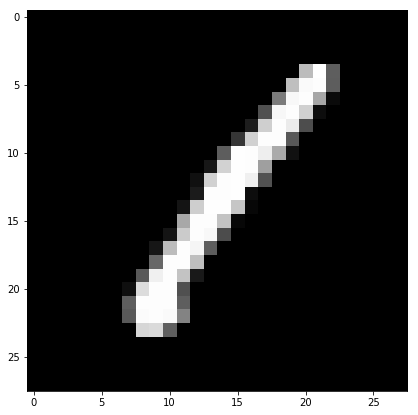

1


In [5]:
#y are the lables
Y = data['label'].values

#x is training dataset

x = data.drop('label', axis = 1)
X = x.values

#visualisation of the data
i = 0

# Basic graphing using matplotlib functions.
plt.figure(figsize = (7,7))
grid_data = x.iloc[i].as_matrix().reshape(28, 28)
plt.imshow(grid_data, interpolation = 'none', cmap = 'gray')
plt.show()
print(Y[i])

In [6]:
#functions
# I have used the most basic activation function called Sigmoid and its just a mathematical
# formula that converts any number into a number between 0 and 1 so we can clasiify if the number 
# is say 7 or not. It can be thought of a probablilty that the input is say 7.

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_p(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [ ]:
# Learning rate can be played around with.
# It is basically how fast or slow the NN takes its steps towards the required minima.
learning_rate = 0.0003

# In this function we define the architecture of the the Neural Network.
# We can change the number of neurons, the number of innner layers and see the 
# effect on the performance of the NN.
def initialise_par(nninput_dim = 784, nnhidden_dim_1 = 256, nnhidden_dim_2 = 256, nnoutput_dim = 10):
    #initialising the parameters
    w1 = np.random.randn(nninput_dim, nnhidden_dim_1) - 1
    w2 = np.random.randn(nnhidden_dim_1, nnhidden_dim_2) - 1
    w3 = np.random.randn(nnhidden_dim_2, nnoutput_dim) - 1
    b1 = np.zeros((1, nnhidden_dim_1)) 
    b2 = np.zeros((1, nnhidden_dim_2)) 
    b3 = np.zeros((1, nnoutput_dim)) 
    #return the model parameters
    model = {'w1': w1, 'w2': w2, 'w3': w3, 'b1':b1, 'b2':b2, 'b3':b3}
    return model
def forward_prop(model, a):
    #get parameters of model
    w1, w2, w3, b1, b2, b3 = model['w1'], model['w2'], model['w3'], model['b1'], model['b2'], model['b3']
    #forward prop to produce predicted value
    z1 = np.dot(a, w1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, w2) + b2
    a2 = sigmoid(z2)
    z3 = np.dot(a2, w3) + b3
    a3 = sigmoid(z3)
    preds = a3
    #cache = {'a1':a1, 'a2': a2, 'a3':a3, 'z1':z1, 'z2':z2, 'z3':z3}
    #return the 1*10 array of predictions
    return preds
def next_batch(X, Y, batch_size):
    # loop over our dataset `X` in mini-batches of size `batchSize`
    for i in range(0, X.shape[0], batch_size):
        # yield a tuple of the current batched data and labels
        yield (X[i:i + batch_size], Y[i:i + batch_size])

loss_history = []
# This is the main train method and it parameters can be changed to increase the accuracy 
# of the NN. For e.g. a increase in the size of the training data has an direct effect on the 
# the final accuracy of the NN.
# Number of iteration (i.e. epochs) is another major parameter influencing the NN performance.
# The batch size can be increased or decreased to speedup/slowdown the NN thus enchancing performance.
# The initial biases for the neurons can also be set in the initialise_par function.
# Over all the NN is highly customisable and has great scope for further enhancements.
def train(model, X, Y):
    w1, w2, w3, b1, b2, b3 = model['w1'], model['w2'], model['w3'], model['b1'], model['b2'], model['b3']
    for epoch in range(200):
        epoch_loss = []
        for (batchx, batchy) in next_batch(X[:30000:], Y, 100):
            #forward prop to produce predicted value
            z1 = np.dot(batchx, w1) + b1
            a1 = sigmoid(z1)
            z2 = np.dot(a1, w2) + b2
            a2 = sigmoid(z2)
            z3 = np.dot(a2, w3) + b3
            a3 = sigmoid(z3)
            preds = a3
            #calculating error 
            error = preds - batchy
            delta_3 = error
            loss = np.sum(error ** 2)
            epoch_loss.append(loss)
            #back propogation of the error(cost) to prevoius layers using formulas derived by differentiating the cost 
            #funtion wrt inputs to specific layers and also wrt to weights and the biases as shown below
            delta_2 = np.multiply(np.dot(delta_3, w3.T), sigmoid_p(a2))
            delta_1 = np.multiply(np.dot(delta_2, w2.T), sigmoid_p(a1))
            #calculating the rate of change of the cost function wrt the weights(for which we need the above deltas)
            dw3 = np.dot(a2.T, delta_3)
            dw2 = np.dot(a1.T, delta_2)
            dw1 = np.dot(batchx.T, delta_1)
            #calculating the rate of change of the cost function wrt the biases(for which we need the above deltas)
            db1 = 1/200 * np.sum(delta_1, axis=0)
            db2 = 1/200 * np.sum(delta_2, axis=0)
            db3 = 1/200 * np.sum(delta_3, axis=0)
  
            db3.values.reshape(1, 10)
            #updating our weights using gradient descend
            w1 -= learning_rate * dw1
            w2 -= learning_rate * dw2
            w3 -= learning_rate * dw3
            b1 -= learning_rate * db1
            b2 -= learning_rate * db2
     
            #b3 -= learning_rate * db3
        loss_history.append(np.average(epoch_loss))
        model = {'w1': w1, 'w2': w2, 'w3': w3, 'b1':b1, 'b2':b2, 'b3':b3}    
        if epoch % 20 == 0:
            print(loss_history)
    return model
def predict(model, x):
    prediction = forward_prop(model, x)
    loc_max = prediction.argmax()
    return loc_max

def cal_accuracy(m, dummies, X):
    correct_guess = 0
    for i in range(5000):
        a0 = X[i+30000:i+30001:]
        number_guess = predict(m, a0)
        number = dummies[i+30000:i+30001:].values.argmax()
        if number == number_guess:
            correct_guess += 1
    return correct_guess/50
        
m = initialise_par()
final_model_par = train(m, X, dummies)
# visual representation of our loss function.
# Clearly it is sloping downwards and hence our NN is learnig properly and will give a good accuracy.
plt.plot(loss_history)
# This accuracy has been calculated using the images that were never seen by the NN.
cal_accuracy(final_model_par, dummies, X)

# This can be used to predict the number in any image that the neural network has not prevoiusly seen.
predict(m, 35000)